<a href="https://colab.research.google.com/github/Spokai3/PhanTichDuLieuVaHocSau/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# hàm để hiển thị các tấm ảnh
import matplotlib.pyplot as plt
# để chọn ngẫu nhiên
import random
# để Load dữ liệu trong tập mẫu
from keras.datasets import mnist
# các hàm sau để xây dựng mô hình mạng neural
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation

***Loading Training Data***

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28x28 pixel
# mỗi pixel có gái trị từ 0-255, 0 là màu đen và 255 là mày trắng sáng nhất
# các giá trị càng gần với 255 th2i càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thướt 28x28
print("x_train shape", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


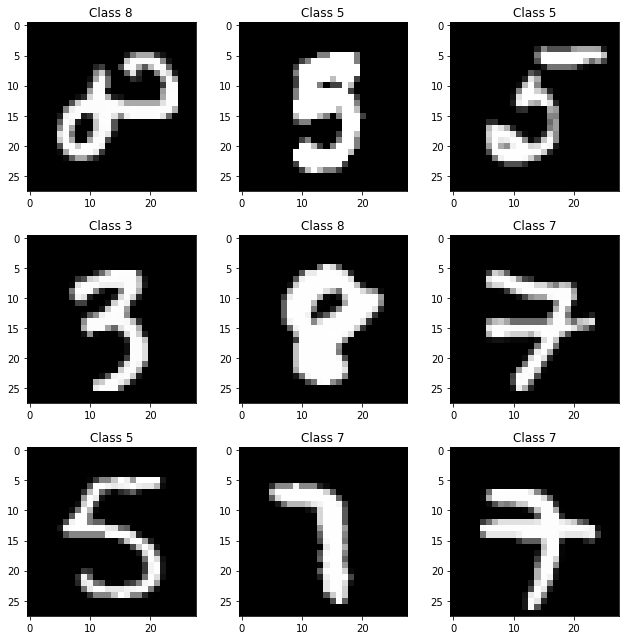

In [3]:
# nếu muốn hiển thị ngẫu nhiên các tấm ảnh trong tập train thì dùng hàm sau
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

***Formatting the input data layer***

In [4]:
# thay đổi kích thước đầu vào chuyển đầu vào của mỗi tấm ảnh về dạng vector
# vì tập dữ liệu mnist được lưu ở dạng
# ma trận 2 chiều gồm 28 dòng và 28 cột
# trước khi truyền vào mạng neural cần chuyển sang dạng vector. Nếu dùng mạng CNN thì ko cần chuyển
# 784 = 28*28
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

# sau khi chuẩn hoa xong muốn xem lại tập train thì cùng hàm print
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
# tương tự đối với tập train, tập test chỉ gồm 10000 tấm ảnh
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

# sau khi chuẩn hóa xong muốn xem lại tập test th2i cùng hàm print
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# vì đầu ta của mạng neural là nhận dạng 1 tấm ảnh thuộc 1 trong các lớp 0-9, nên ta dugn2 hàm này để
# gán các giá trị kết quả cho tập y_test
# ví dụ tấm ảnh là số 2 th2i y_test ứng với tấm đó là
# [[0. 0. 1. ... 0. 0. 0.]]
# giá trị ở vị trí số 2 là 1, các giá trị còn lại là 0
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

**The first hidden layer**

In [7]:
model = Sequential()
# add vào 1 lớp input, có 10 neural (10 neural) và mỗi neural có 784 input
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('relu'))

**Adding the second hidden layer**

In [8]:
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))

**The Final Output Layer**

In [9]:
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0>9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
# Với các bài toán classification (phân loại) thì nếu có 2 lớp thì hàm activation ở output layer là hàm sigmoid
# còn nhiều hơn 2 lớp thì hàm activation ở output layer là hàm softmax
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
______________________________________________________

**Hàm loss function**

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# mỗi lần lấy 128 tấm ảnh để train
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5)

# dự báo mô hình, giá trị dự báo được lưu vào biến predicted_classes
# giá trị thực tế được lưu ở tập t_test
predicted_classes = model.predict(x_test)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6431 - accuracy: 0.8224
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.9102
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9227
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2438 - accuracy: 0.9302
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2265 - accuracy: 0.9365


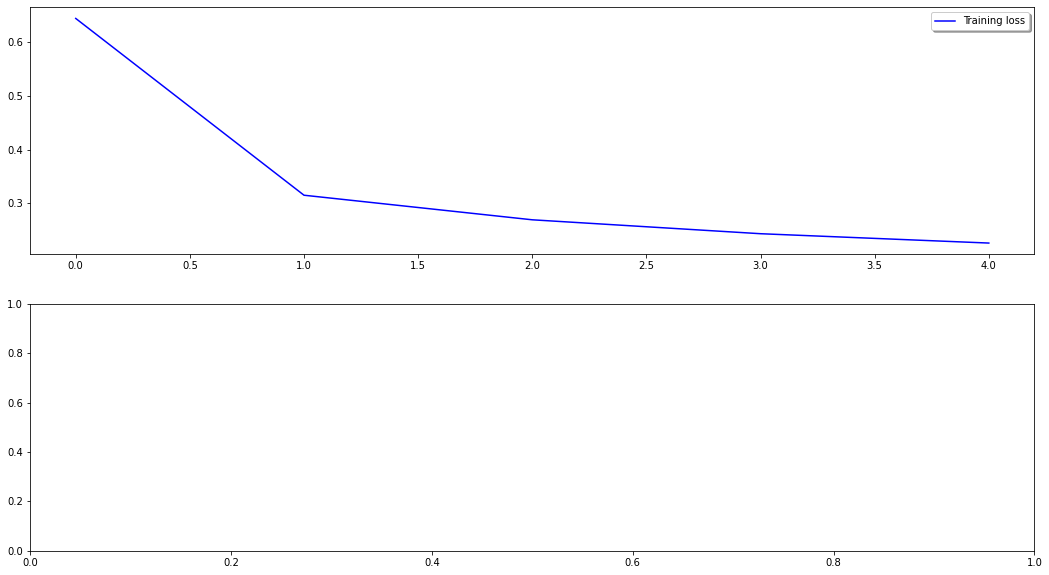

In [11]:
fig, ax = plt.subplots(2, 1, figsize = (18, 10))
ax[0].plot(history.history['loss'], color='b', label='Training loss')
legend = ax[0].legend(loc='best', shadow=True)

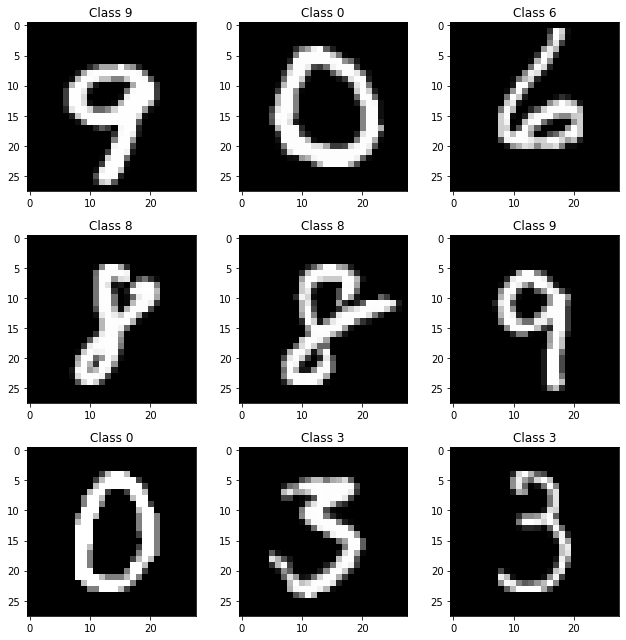

In [13]:
# hiển thị 9 tấm ảnh ngẫu nhiên trong tập test 
# hiển thị kết quả dự báo của 9 tấm ảnh này theo mô hình neural vừa xây dựng
# vì hàm imshow để hiển thị tấm ảnh dạng 28*28, vì ta đã reshape tấm ảnh thành dạng vector ở bước trước
# nên bây giờ muốn hiển thị tấm ảnh cho tập dữ liệu đã reshape, ta lại dùng hàm reshape để về dạng ban đầu
# vì hàm softmax dùng ở mạng neural ở lớp output là hàm tính xác suất, nên xác suất rơi vào lớp nào nhiều nhất thì output sẽ ra giá trị đó.
# muốn xuất kết quả dự báo, ta dùng hàm argmax()
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap ='gray', interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()
# sinh viên quan sát kết quả và nhận xét

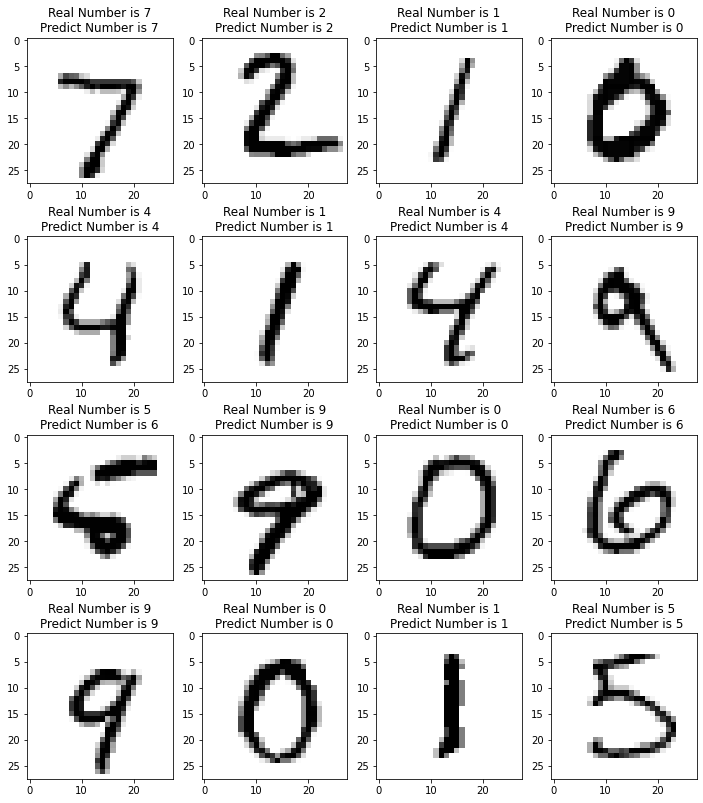

In [16]:
x_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12,14))
for i, ax in enumerate(axis.flat):
  ax.imshow(x_test__[i], cmap = 'binary')
  ax.set(title = f'Real Number is {y_test[i].argmax()}\nPredict Number is {x_pred[i].argmax()}');

***Nhận dạng chữ viết tay với TENSORFLOW***

*Nội dung:*


1.   Mô tả dữ liệu MNIST cho bài toán nhận dạng chữ viết tay
2.   Quá trình học và dự báo
3.   Bài tập áp dụng

**1. Mô tả dữ liệu MNIST cho bài toán nhận dạng chữ viết tay:**

Mô tả dữ liệu: tập dữ liệu về chữ số viết tay là MNIST. Dữ liệu chia thành 3 phần, 55 000 dòng cho tập train, 10000 dòng cho tập test và 5000 dòng cho tập validation

**Yêu cầu: xây dựng mô phân loại cho bài toán trên, sử dụng mạng neural.**

**Hướng dẫn thực hiện:**

Import thư viện và load tập dữ liệu vào biến mnist




In [17]:
from tensorflow_examples.tutorials.mnist import input_data

ModuleNotFoundError: ignored